In [48]:
import pandas as pd

In [49]:
df=pd.read_csv(r'C:\Users\D\Desktop\Churn_Modelling.csv')

In [50]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
df.shape

(10000, 14)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [53]:
df.duplicated().sum()

0

In [54]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [55]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [56]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [57]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

ohe = OneHotEncoder()
geo_ohe = ohe.fit_transform(df[["Geography"]]).astype(int)

geo_ohe_df = pd.DataFrame(ohe.fit_transform(df[["Geography"]]).toarray(), columns=["Geography_France", "Geography_Germany", "Geography_Spain"])
df = pd.concat([df, geo_ohe_df], axis=1)
df = df.drop("Geography", axis=1)

In [66]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0


In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [69]:
x_train_scaled

array([[-0.23082038,  0.91509065, -0.94449979, ..., -0.50429326,
        -0.99850112,  1.71490137],
       [-0.25150912, -1.09278791, -0.94449979, ..., -0.50429326,
         1.00150113, -0.58312392],
       [-0.3963303 , -1.09278791,  0.77498705, ...,  1.98297314,
        -0.99850112,  1.71490137],
       ...,
       [ 0.22433188, -1.09278791,  0.58393295, ...,  1.98297314,
         1.00150113, -0.58312392],
       [ 0.13123255, -1.09278791,  0.01077067, ..., -0.50429326,
         1.00150113, -0.58312392],
       [ 1.1656695 ,  0.91509065,  0.29735181, ...,  1.98297314,
        -0.99850112,  1.71490137]])

In [101]:
import tensorflow as tf
m=tf.keras.Sequential([tf.keras.layers.Flatten(),
tf.keras.layers.Dense(3,activation="sigmoid",input_dim=11),tf.keras.layers.Dense(1,activation="relu")])
m.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])
history=m.fit(x_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 1.6524 - accuracy: 0.6697 - val_loss: 1.3086 - val_accuracy: 0.6469
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.8904 - accuracy: 0.6277 - val_loss: 0.7495 - val_accuracy: 0.6175
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.7567 - accuracy: 0.6228 - val_loss: 0.7086 - val_accuracy: 0.6256
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.6430 - val_loss: 0.6774 - val_accuracy: 0.6519
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.6669 - val_loss: 0.6394 - val_accuracy: 0.6681
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.6856 - val_loss: 0.6047 - val_accuracy: 0.6913
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.7092 - val_loss: 0.5747 - val_accuracy: 0.7237
Epoch 

In [93]:
m.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (32, 12)                  0         
                                                                 
 dense_16 (Dense)            (32, 3)                   39        
                                                                 
 dense_17 (Dense)            (32, 1)                   4         
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [94]:
y_pred=m.predict(x_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [102]:
import numpy as np
y_preds=np.where(y_pred>0.5,1,0)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

1.0

In [104]:
import matplotlib.pyplot as plt
history.history

{'loss': [1.6523722410202026,
  0.8903887271881104,
  0.7567225694656372,
  0.7052677273750305,
  0.675141453742981,
  0.6284546852111816,
  0.5909686088562012,
  0.5681445598602295,
  0.5470082759857178,
  0.5252306461334229,
  0.505419909954071,
  0.48234254121780396,
  0.46142593026161194,
  0.438009649515152,
  0.4144054055213928,
  0.38848862051963806,
  0.3597082495689392,
  0.32786810398101807,
  0.2933001220226288,
  0.25697705149650574,
  0.21994395554065704,
  0.18312738835811615,
  0.14733698964118958,
  0.11304675787687302,
  0.08094058185815811,
  0.05110315978527069,
  0.023561453446745872,
  0.007125245872884989,
  0.0029395436868071556,
  0.0015259134816005826,
  0.0008926856680773199,
  0.0005575313698500395,
  0.0003813237708527595,
  0.00026974722277373075,
  0.000202888113562949,
  0.00015348930901382118,
  0.00011432862811489031,
  8.406609413214028e-05,
  5.9116679040016606e-05,
  3.948077210225165e-05,
  2.642064828251023e-05,
  1.580879143148195e-05,
  1.1043794

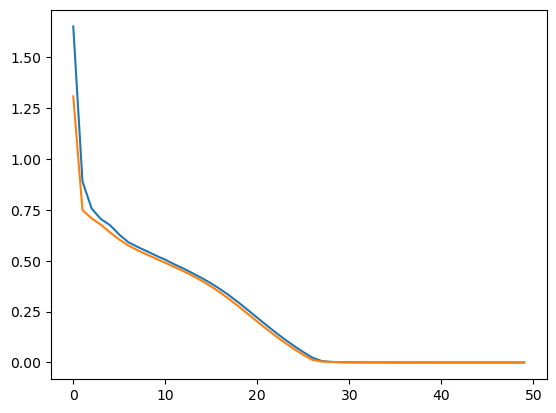

In [105]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

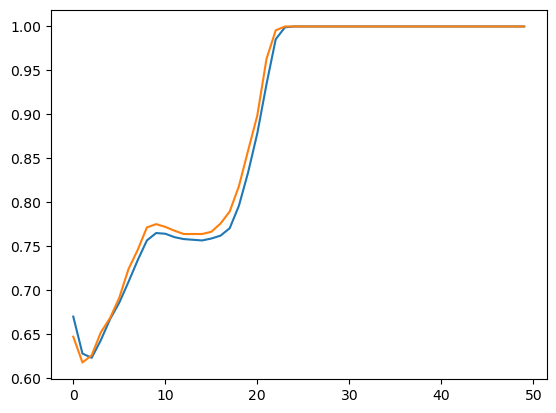

In [106]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])